## Image File Data 불러오기

In [2]:
import os
from glob import glob

import numpy as np
import tensorflow as tf

import matplotlib.pyplot as plt
%matplotlib inline

data_paths = glob('../dataset/cifar/train/*.png')
print(len(data_paths))

50000


(32, 32, 3)


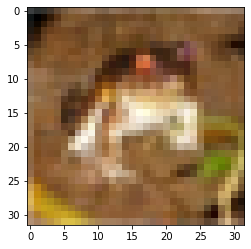

In [20]:
# tensorflow image 읽어들이기를 이용해서 이미지 읽어오기
def read_image(path):
    gfile = tf.io.read_file(path)
    image = tf.io.decode_image(gfile, dtype = tf.float32)
    return np.array(image)

img = read_image(data_paths[0])
print(img.shape)
plt.imshow(img)
plt.show()

## Batch image list

In [34]:
# make batch size tensor - 1
# return batch size 만큼 tensor 합친거 리턴

import cv2

# batch size 로 묶인 이미지 tensor 뽑아내기
# 매개변수로 glob 으로 각 이미지 path 묶어논 리스트 들어옴 (batch_paths)
def make_batch(batch_paths):
    batch_images = []
    
    for path in batch_paths:
        image = read_image(path)
        image = cv2.resize(image, (32,32))
        batch_images.append(image)
        
    # tensor 형태로 return
    return tf.convert_to_tensor(batch_images)

make_batch(data_paths[:8]).shape

TensorShape([8, 32, 32, 3])

(16, 32, 32, 3)


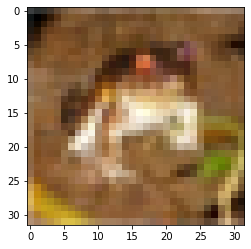

(16, 32, 32, 3)


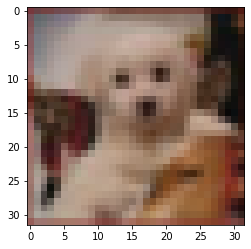

(16, 32, 32, 3)


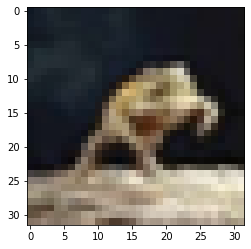

(16, 32, 32, 3)


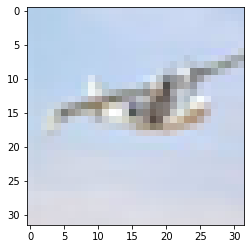

(16, 32, 32, 3)


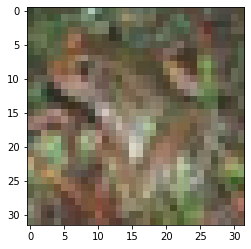

(16, 32, 32, 3)


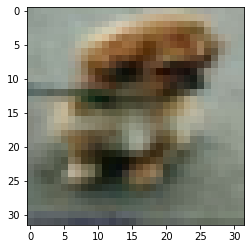

(16, 32, 32, 3)


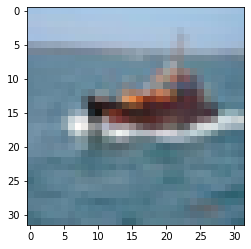

(16, 32, 32, 3)


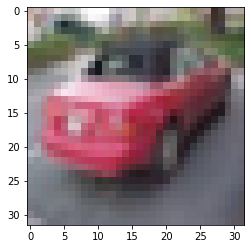

In [49]:
# make batch size tensor - 2

batch_size = 16
all_step = len(data_paths)/(batch_size)

# 원래는 all_step (6250) 이 들어가야되는데 너무 많아져서 임의로 8
for step in range(8): # all_step
    batch_images = make_batch(data_paths[step * batch_size: (step+1)*batch_size])
    print(batch_images.shape)
    plt.imshow(batch_images[0])
    plt.show()